# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import shap

In [3]:
shap.initjs()

# Load Dataset

In [4]:
task = pd.read_csv('task.csv')

In [5]:
task.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [6]:
task.describe()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4.407000e+03,4400.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,4.106655e+09,506.553864,22.335602,7.171576,9.874064,194.130365,16.942615,3.249388,72.119006,0.497844,338.851046,98.922260,16.812003,25.681004,27.622151,0.162009,0.103245
std,6.794948e+09,326.072756,43.591246,19.209092,5.169639,1548.361547,128.268824,5.509869,117.019515,1.199725,831.746150,297.692950,68.045904,55.324218,61.069006,0.517693,0.304313
min,4.100390e+05,111.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184510e+08,226.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.142857,2.727273,0.000000,0.000000,13.500000,2.500000,4.461538,4.384615,0.000000,0.000000
50%,7.296626e+08,493.000000,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,40.000000,40.000000,6.333333,12.266667,12.933333,0.000000,0.000000
75%,7.292936e+09,1005.000000,30.000000,5.666667,14.000000,0.000000,0.000000,4.333333,100.000000,0.000000,327.280000,101.291667,14.250000,28.000000,30.784615,0.153846,0.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000


In [7]:
task.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4407 non-null   int64  
 1   account_id             4400 non-null   float64
 2   max_return_days        4407 non-null   int64  
 3   average_return_days    4407 non-null   float64
 4   customer_since_months  4407 non-null   int64  
 5   total_revenue          4407 non-null   float64
 6   average_revenue        4407 non-null   float64
 7   avg_vas_count          4407 non-null   float64
 8   avg_used_vas_value     4407 non-null   float64
 9   business_type          4407 non-null   int64  
 10  avg_wallet_bonus       4407 non-null   float64
 11  avg_active_ads         4407 non-null   float64
 12  avg_new_ads            4407 non-null   float64
 13  avg_email_replies      4407 non-null   float64
 14  avg_call_replies       4407 non-null   float64
 15  avg_

In [8]:
task.isna()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4403,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4404,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4405,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# EDA

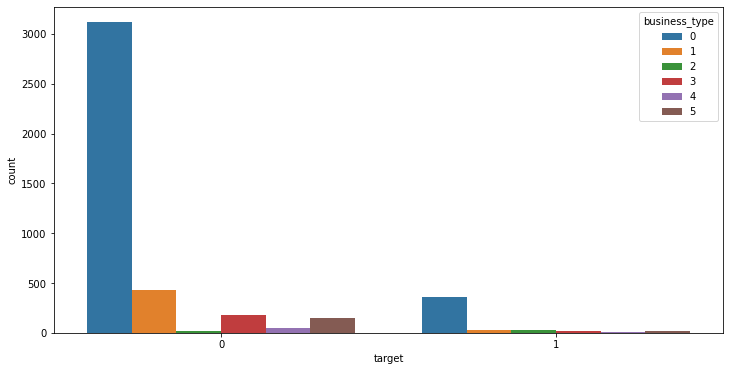

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'target', hue = 'business_type', data = task)

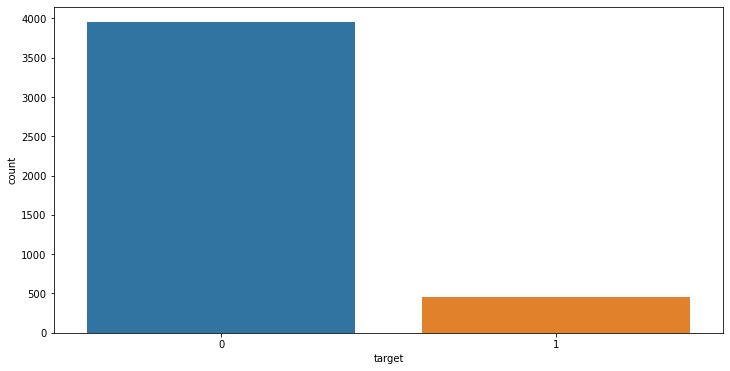

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x ='target',data = task)

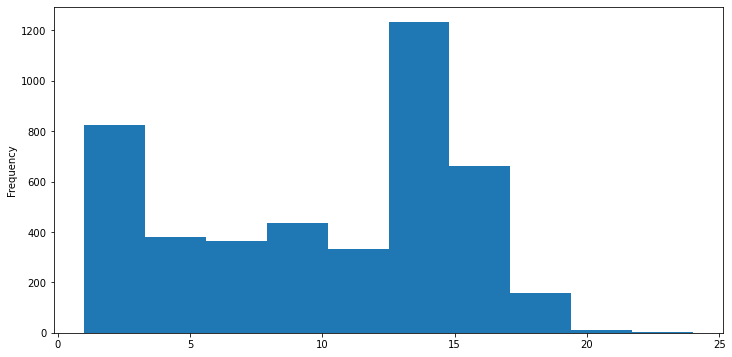

In [13]:
task['customer_since_months'].plot.hist(figsize=(12,6))

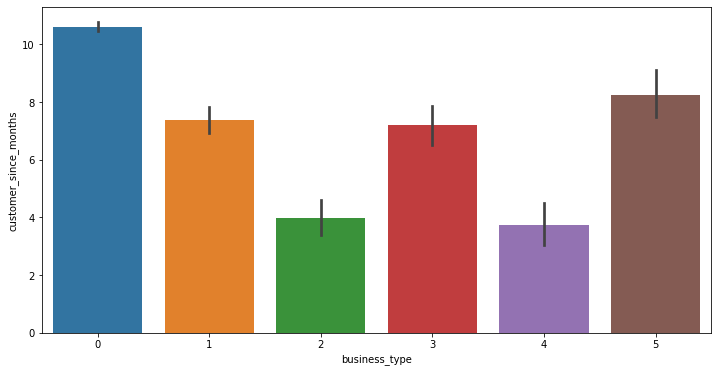

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(data=task,x='business_type', y='customer_since_months')

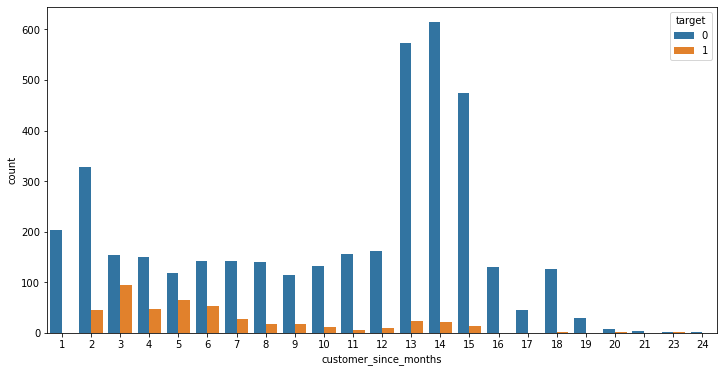

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x='customer_since_months', hue = 'target',data=task)

Default bandwidth for data is 0; skipping density estimation.


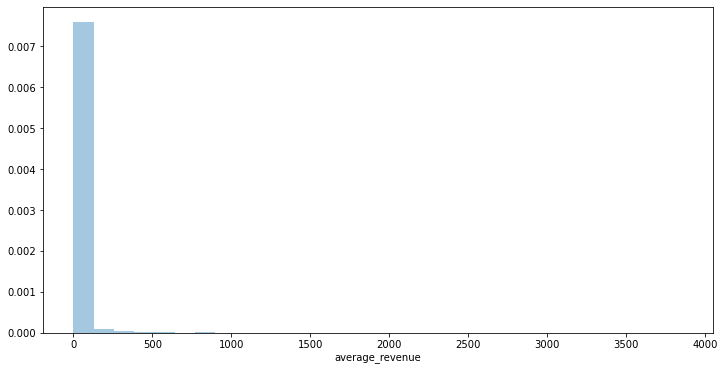

In [17]:
plt.figure(figsize=(12,6))
sns.distplot(task['average_revenue'],bins = 30)

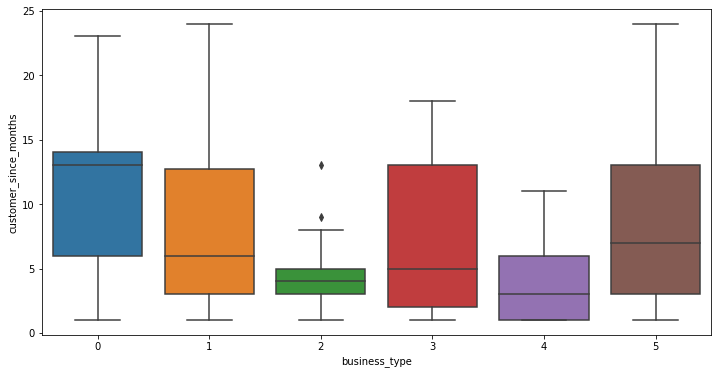

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(x='business_type',y='customer_since_months',data=task)

# Feature Engineering

In [24]:
task.corr()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
user_id,1.000000,0.056700,0.028499,0.026847,-0.181716,-0.033229,-0.016305,-0.101787,-0.113606,0.042143,-0.096286,-0.061322,-0.004062,-0.105138,-0.098300,-0.070980,0.048490
account_id,0.056700,1.000000,0.186045,0.114084,-0.138623,-0.056088,-0.063251,-0.123744,-0.137692,-0.023560,-0.115246,-0.104818,-0.049433,-0.111508,-0.115326,-0.082611,0.121939
max_return_days,0.028499,0.186045,1.000000,0.749094,-0.186734,-0.001811,0.013263,-0.112033,-0.118764,-0.019023,-0.131315,-0.042675,-0.008815,-0.075633,-0.079001,-0.050154,0.275005
average_return_days,0.026847,0.114084,0.749094,1.000000,-0.256605,-0.014424,-0.006545,-0.108025,-0.113959,0.026801,-0.103527,-0.046713,-0.016387,-0.070537,-0.070755,-0.038732,0.165715
customer_since_months,-0.181716,-0.138623,-0.186734,-0.256605,1.000000,0.090540,0.063951,0.321568,0.350931,-0.218603,0.352093,0.138861,0.019360,0.206298,0.206565,0.123171,-0.234972
total_revenue,-0.033229,-0.056088,-0.001811,-0.014424,0.090540,1.000000,0.950358,0.608588,0.642122,-0.017495,0.075943,0.341777,0.130780,0.214070,0.214298,0.213396,-0.032571
average_revenue,-0.016305,-0.063251,0.013263,-0.006545,0.063951,0.950358,1.000000,0.586251,0.612556,-0.001665,0.070069,0.354470,0.132430,0.209710,0.209277,0.214935,-0.025354
avg_vas_count,-0.101787,-0.123744,-0.112033,-0.108025,0.321568,0.608588,0.586251,1.000000,0.962312,-0.119815,0.131268,0.413862,0.191781,0.360756,0.342740,0.240634,-0.117167
avg_used_vas_value,-0.113606,-0.137692,-0.118764,-0.113959,0.350931,0.642122,0.612556,0.962312,1.000000,-0.119799,0.156331,0.407619,0.185732,0.363019,0.347185,0.244277,-0.128469
business_type,0.042143,-0.023560,-0.019023,0.026801,-0.218603,-0.017495,-0.001665,-0.119815,-0.119799,1.000000,-0.107555,-0.076337,-0.005084,-0.050476,-0.054189,0.005367,0.005272


In [25]:
task.drop(['user_id','account_id'], axis = 1, inplace = True)

In [26]:
task.head()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


# Train Test split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(task.drop('target',axis=1), task['target'], test_size=0.30,random_state=101)

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [29]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [30]:
predictions = logmodel.predict(X_test)

# Model Evaluation

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1194
           1       0.55      0.13      0.21       129

    accuracy                           0.90      1323
   macro avg       0.73      0.56      0.58      1323
weighted avg       0.88      0.90      0.88      1323



In [33]:
print(confusion_matrix(y_test,predictions))

[[1180   14]
 [ 112   17]]


# Using SHAP to visualize the model

In [34]:
explainer = shap.LinearExplainer(logmodel,X_train,feature_dependence="independent")

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!


In [35]:
shap_values = explainer.shap_values(X_test)

In [36]:
shap_values[0]

array([-0.29857434,  0.13329656, -0.73911556,  0.07000179, -0.04374927,
        0.17299965, -0.6647016 ,  0.15246017,  0.06126232,  0.09735987,
        0.01380138, -0.18254499,  0.07673095, -0.00199964])

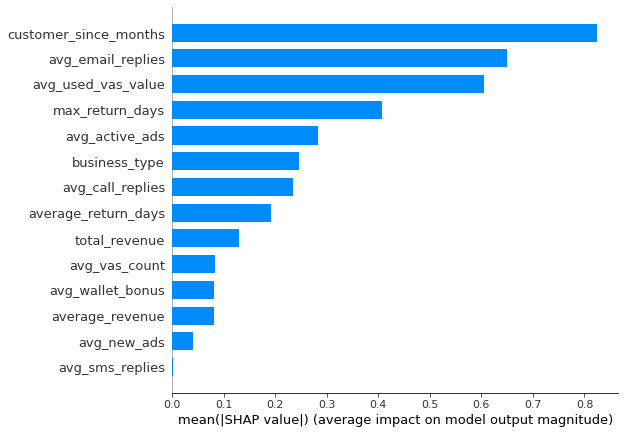

In [37]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

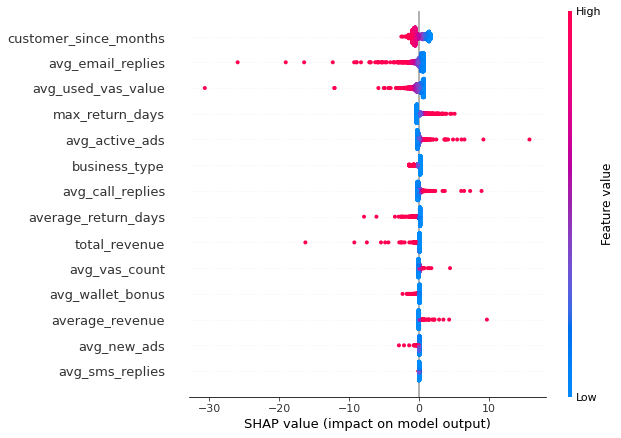

In [38]:
shap.summary_plot(shap_values, X_test)